# Differential- og integralregning (en variabel)

Vi vil i denne notebook gennemgå hvordan vi benytter SymPy til at differentiere og integrere funktioner af en variabel, samt hvordan vi bestemmer Taylorpolynomier.

For simpelhedens skyld vil vi i hele notebooken benytte $x$ som den uafhængige variabel, mens $a$, $b$, $A$ og $\omega$ er konstanter. Vi starter med at importere SymPy og definere de variable

In [1]:
import sympy as sp                         # Importer sympy
from sympy.abc import a, b, A, omega, x    # Vi definerer symboler, som vi kommer til at bruge
from sympy import oo, pi                   # Vi importerer uendelig og pi

## Reduktion

SymPy viser differentierede eller integrerede funktioner på en måde, der nogle gange i højere grad afspejler den bagvedliggende algoritme end almindelig notationspraksis. Inden vi går i gang med at differentiere og integrere vil vi derfor først stifte bekendtskab med SymPys reduktions-værktøj.

En reduktion foretages i SymPy ved at bruge <code>sp.simplify(udtryk)</code> eller `udtryk.simplify()` 

Eksempel: Reducér $2\cos^2(x) + \sin^2(x)$

In [2]:
# Vi definerer funktionen f:
f = 2 * sp.cos(x) ** 2 + sp.sin(x) ** 2
display(f)

# Vi reducere det nu
f_reduced = sp.simplify(f)
display(f_reduced)

sin(x)**2 + 2*cos(x)**2

cos(x)**2 + 1

Bemærk først at SymPy viser ledene i det oprindelige udtryk i omvendt rækkefølge i forhold til hvordan vi skrev dem i definitionen. I reduktionstrinnet herefter anvender SymPy den trigonometriske identititet $\cos^2(x) + \sin^2(x) = 1$.

Hvad der udgør et optimalt reduceret udtryk afgøres af SymPys algoritmer, hvilket ikke altid stemmer med vores egne præferencer. 

Et eksempel på dette kunne være følgende udtryk:

In [26]:
udtryk1 = (x+a+b)**3 - (x+a-b)**3
display(udtryk1)
display(sp.simplify(udtryk1))

-(a - b + x)**3 + (a + b + x)**3

-(a - b + x)**3 + (a + b + x)**3

SymPy foretrækker således denne form frem for den udgave, hvor parenteserne er ganget ud.
Hvis man ønsker et udtryk af en særlig form, findes der relaterede funktioner i SymPy, der laver omskrivninger til mere specifikke formater. [Se en liste her](https://docs.sympy.org/latest/tutorial/simplification.html). I dette tilfælde kan man f.eks. bruge funktionen <code>expand</code>:

In [4]:
display(sp.expand(udtryk1))

6*a**2*b + 12*a*b*x + 2*b**3 + 6*b*x**2

Hvis man blot skal tjekke et resultat uden at være interesseret i logikken bag omskrivningerne, kan det være praktisk at bruge det trick, som vi introducerer i eksemplet her:

I en pointopgave uden hjælpemidler skal vi reducere udtrykket $(\frac{1}{2}x+3a+3b)^2 - (\frac{1}{2}x+a+b)^2$. 

Vi genkender i et lyst øjeblik den såkaldte tredje kvadratsætning $(c+d)\cdot(c-d) = c^2-d^2$. 

Hvis vi sætter $c=\frac{1}{2}x+3a+3b$ og $d=\frac{1}{2}x+a+b$. Kan vi benytte følgende omskrivning:  

$(c+d)\cdot(c-d) = (x+4a+4b)\cdot(2a+2b)$  

Det er nydeligt, men vi vil gerne tjekke med Python:

In [5]:
udtryk2 = (x/2+3*a+3*b)**2 - (x/2+a+b)**2
display(udtryk2)
display(sp.expand(udtryk2))

-(a + b + x/2)**2 + (3*a + 3*b + x/2)**2

8*a**2 + 16*a*b + 2*a*x + 8*b**2 + 2*b*x

Dette er også et nydeligt udtryk, og uden at vi kender sammenhængen kan vi ikke afgøre hvilket et, der er det pæneste rent notationsmæssigt. Men hvis vi vil tjekke at de to udtryk er ens (f.eks. for at være sikker på at vi har regnet rigtigt), kunne vi nu gange $(x+4a+4b)\cdot(2a+2b)$ ud og sammenligne led, men vi kan også blot beregne forskellen:

In [6]:
udtryk3 = (x/2+3*a+3*b)**2 - (x/2+a+b)**2 - (x+4*a+4*b)*(2*a+2*b)
display(sp.simplify(udtryk3))

0

## Differentiation
Syntaksen for differentiation ligner meget det, vi så, da vi beregnede grænseværdier (se [afsnittet om grænseværdier])(Notebook2_limits.ipynb). Vi benytter her funktionen <code>sp.diff()</code> og angiver udtryk og hvilken variabel, vi vil differentere efter: <code>sp.diff(udtryk, variabel)</code>.

Hvis vi eksempelvis ønsker at differentiere $\displaystyle b x^{a}$ med hensyn til $x$, kan vi altså gøre følgende:

In [7]:
expr = b * x ** a                # Vi definerer udtrykket
display(expr)

diff_expr = sp.diff(expr, x)     # Her differentieres det
display(diff_expr) 

b*x**a

a*b*x**a/x

Som kan simplificeres med <code>sp.simplify()</code>:

In [8]:
sp.simplify(diff_expr)

a*b*x**(a - 1)

Ønsker vi at differentiere en funktion flere gange, angiver vi blot antallet af gange, vi vil differentiere funktionen, som ekstra argument: <code>sp.diff(udtryk, variabel, antalgange)</code>. 

Eksempel: Lad os differentiere funktionen $f(x) = A \cos(\omega x)$ med hensyn til $x$ fem gange.

In [9]:
f = A * sp.cos(omega * x)      # Definer udtrykket
diff_f5 = sp.diff(f, x, 5)     # Angiv differentieringen, med det ekstra argument: 5, for at differentiere fem gange
display(diff_f5)

-A*omega**5*sin(omega*x)

Bemærk at SymPy godt kan snydes. Vi betragter f.eks. den stykvist lineære funktion fra notebooken i uge 3, og differentierer:

Piecewise((-1, x < 4), (x - 5, True))

Piecewise((0, x < 4), (1, True))

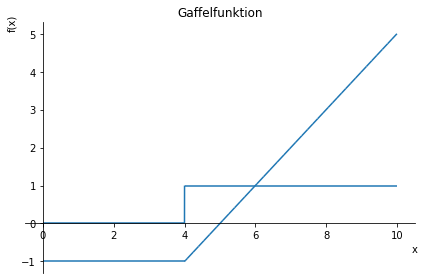

In [3]:
g = sp.Piecewise((-1, x < 4), (x-5, x >= 4))
display(g)

diff_g = sp.diff(g, x)
display(diff_g)

from sympy.plotting import plot
figur = plot(g, diff_g, (x, 0, 10), title = "Gaffelfunktion")

Vi ser at SymPy håndterer differentiationen rimeligt godt, men at $g'(4)$ angives til 1 selvom $g$ ikke er differentiabel her. Den "lodrette del af grafen" ved $x=4$ burde også vække vores mistanke.

Et andet relateret eksempel er funktionen $h(x) = \frac{x^2-4}{x+2}$, som ikke er defineret for $x=-2$ fordi nævneren da bliver nul, men som for $x\neq-2$ kan reduceres ved hjælp af tredje kvadratsætning (idet tælleren omskrives $x^2-4 = (x+2)(x-2)$) til $h(x) = x-2$. Vi beder SymPy om at differentiere hhv. med og uden efterfølgende reduktion af resultatet:

In [11]:
display(sp.diff((x**2 - 4)/(x + 2)))
display(sp.simplify(sp.diff((x**2 - 4)/(x + 2))))

2*x/(x + 2) - (x**2 - 4)/(x + 2)**2

1

Vi ser at det første udtryk er korrekt, men at SymPy uden forbehold reducerer udtrykket uden hensyntagen til at $h(x)$ slet ikke er defineret for $x=-2$. Man skal altså selv være særlig opmærksom på punkter, hvor en givet funktion ikke er defineret eller ikke er differentiabel!

## Taylorudvikling
Vi kan benytte SymPy til at lave en Taylorudvikling for en given funktion omkring et punkt $x_0$. Dette gøres med <code>sp.series()</code>, der skal have argumenterne <code>sp.series(funktionsudtryk, variabelnavn, x_0, orden)</code>  .  
Vi kan eksempevis udvikle $e^{3x}$ omkring $x_0=0$ til 5. orden ved at skrive:

In [12]:
expr = sp.exp(3*x)                    # Definer funktionsudtrykket. 
taylor_exp = sp.series(expr, x, 0, 5) # Lav en taylorrække omkring x_0 = 0 af udtrykket til 5. orden
display(taylor_exp)                   # Vis udtrykket

1 + 3*x + 9*x**2/2 + 9*x**3/2 + 27*x**4/8 + O(x**5)

Et andet eksempel hvor leddene ikke præsenteres i samme logiske orden er udviklingen til 4. orden af funktionen $f(x) = \frac{3}{1-3x}$ omkring $x_0 = 1$. 

In [13]:
expr = 3 / (1-3*x)                       # Definer
taylor_expr = sp.series(expr, x, 1, 4)   # Beregn taylorudviklingen / Taylorrækken
display(taylor_expr)                     # Vis

-15/4 - 27*(x - 1)**2/8 + 81*(x - 1)**3/16 + 9*x/4 + O((x - 1)**4, (x, 1))

Hvis vi skal regne videre med dette udtryk uden restleddet eller tegne grafer, kan vi fjerne restleddet ved at skrive <code>expr.removeO()</code>:

In [14]:
taylor_expr = taylor_expr.removeO()
display(taylor_expr)                     # Vis

9*x/4 + 81*(x - 1)**3/16 - 27*(x - 1)**2/8 - 15/4

Nu kan vi tegne grafen for Taylorapproximationen til $f(x)$:

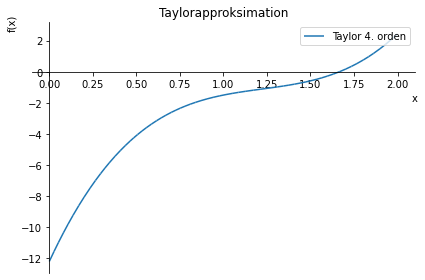

In [15]:
from sympy.plotting import plot   # Importer plot-funktionen

# Vi genererer nu vores graf som en figur med passende titel og aksegrænser
figur = plot(taylor_expr, (x, 0, 2), legend = True, title = "Taylorapproksimation", label = "Taylor 4. orden");


Vi tilføjer nu vores originale funktion for at sammenligne:

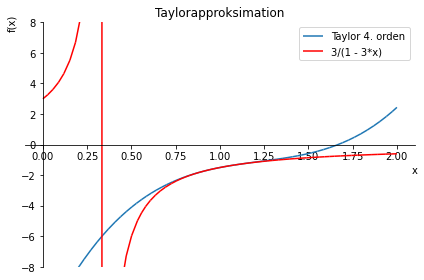

In [16]:
# Vi laver nu en ny graf med den originale funktion.
# Bemærk, at vi skriver show = False for ikke at vise denne inden vi er færdige
original = plot(expr, (x, 0 , 2), line_color = 'red', show = False)

# Vi tilføjer vores original graf til vores figur ved at bruge .append() ... se notebooken fra uge 3 for en forklaring.
figur.append(original[0])

# Vi skal nu tilpasse y.aksen, da det originale udtryk får meget store, negative værdier for x -> 1/3
figur.ylim = (-8, 8)

# Til sidst viser vi figuren
figur.show()

Som ventet er Taylorapproximationen god i nærheden af udviklingspunktet $x_0 = 1$.

## Integration
Fremgangsmåden for integration og differentiation minder utrolig meget om hinanden med den oplagte undtagelse, at man både kan beregne bestemte og ubestemte integraler (altså hhv. med og uden grænser). Vi bruger funktionen <code>sp.integrate</code>. Et ubestemt integral findes ved 
```python
sp.integrate(udtryk, variabel)
```
mens bestemte integraler beregnes med 
```python
sp.integrate(udtryk, (variabel, fra, til))
```
Bemærk at der skal en parentes omkring den variable og grænserne på samme måde som når man angiver et interval ved graftegning.

Vær opmærksom på, at SymPys integrationsresultater udelader den vilkårlige additive integrationskonstant.

Eksempel: Find stamfunktionen til $x^4$:

In [17]:
expr = x ** 4                               # Definer udtryk
stamfunktion_expr = sp.integrate(expr, x)   # Integrer udtrykket med hensyn til x
display(stamfunktion_expr)                  # vis

x**5/5

På samme måde findes det bestemte integral $\int_0^{6\pi}(\sin(x))^2dx$ som også kan skrives som $\int_0^{6\pi}\sin^2(x)dx$:

In [18]:
expr = sp.sin(x) ** 2                 # Definer udtryk
sp.integrate(expr, (x, 0, 6 * pi))    # Integrer udtrykket med hensyn til x fra 0 til 6 pi

3*pi

Oftest kan det også være nyttigt at bruge enten algebraiske symboler eller eventuelt at integrere til uendelig. Her indskriver man bare dette i det bestemte integrals grænser. 

In [19]:
# Vi kan eventuelt udregne integralet for en gaussisk funktion
expr = sp.exp(- x ** 2)
sp.integrate(expr, (x, -oo, oo))

sqrt(pi)

In [4]:
# Eller vi kan integrere en polynomium fra a til b
from sympy.abc import a, b
expr = x ** 3 - 1

sp.integrate(expr, (x, a, b))

-a**4/4 + a + b**4/4 - b

## Alternativ Syntaks

I løbet af denne Notebook har vi benyttet os af en forholdsvis stringent metode at skrive funktioner op på, som altid indeholder <code>sp.funktion()</code>. Mange af disse metoder er dog også allerede indbygget i de enkelte udtryks syntaks. Vi kan f.eks. i stedet for at skrive <code>sp.simplify(expr)</code> skrive <code>expr.simplify()</code>. Dette er en lille smutvej, men det giver nogle gange god mening at bruge. Herunder er vist nogle korte eksempler:

In [21]:
# Vi viser, at man kan differentiere på følgende to ekvivalente måder:
expr = sp.sin(x)

sp.diff(expr)

cos(x)

In [22]:
expr.diff(x)

cos(x)

Ligeledes kan vi benytte simplify og integration på denne måde:

In [23]:
expr = 2 * (1 - sp.cos(2 * x))

# Vi simplificerer
expr.simplify()                   

4*sin(x)**2

In [24]:
# Beregner et bestemt integral
expr.integrate((x, 0, pi))        

2*pi

In [25]:
# Finder stamfunktion ved brug af integrate
expr.integrate(x)                 

2*x - sin(2*x)